In [1]:
import pandas as pd
import sys

In [2]:
sys.path.append('../')

In [3]:
from utils import SIR, run
from vaccination_strategy.degree_based_strategy import degree_based_vaccination_strategy

In [4]:
metadata = pd.read_csv('../data/generation/metadata.csv', sep='\t', lineterminator='\n', names=['id','age', 'apartment','home', 'family','office','school'])
# Have to remove the first row as it is headings duplicated
metadata = metadata.iloc[1:, : ]
df = pd.read_csv('../data/generation/contact_network.csv')

In [5]:
df.head()

,Unnamed: 0,timestamp,p1,p2
0,0,1,4,75
1,1,1,16,26
2,2,1,96,65
3,3,1,38,31
4,4,1,70,97


In [6]:
metadata.head()

,id,age,apartment,home,family,office,school
1,0,40,0,-1,0,7,-1
2,1,11,0,-1,0,-1,2
3,2,8,0,-1,0,-1,1
4,3,71,0,-1,0,-1,-1
5,4,70,0,-1,0,-1,-1


In [7]:
model = SIR(
    metadata=metadata,
    df=df
)

In [8]:
vaccinated = degree_based_vaccination_strategy(model,20,5)

In [9]:
print(vaccinated)

[1, 5, 7, 15, 16, 21, 26, 31, 35, 38, 43, 52, 63, 64, 65, 67, 68, 70, 72, 79, 85, 91, 94, 96, 97, 103, 105, 13, 20, 84, 34]


At day 0
Number of susceptible:  352
Number of infected:  30
Number of recovered:  0
Number of deceased:  0
After 1 day(s) 
Number of susceptible:  333
Number of infected:  48
Number of recovered:  1
Number of deceased:  0
After 2 day(s) 
Number of susceptible:  310
Number of infected:  71
Number of recovered:  1
Number of deceased:  0
After 3 day(s) 
Number of susceptible:  286
Number of infected:  93
Number of recovered:  3
Number of deceased:  0
After 4 day(s) 
Number of susceptible:  264
Number of infected:  112
Number of recovered:  6
Number of deceased:  0
After 5 day(s) 
Number of susceptible:  220
Number of infected:  124
Number of recovered:  38
Number of deceased:  0
After 6 day(s) 
Number of susceptible:  199
Number of infected:  138
Number of recovered:  45
Number of deceased:  0
After 7 day(s) 
Number of susceptible:  180
Number of infected:  150
Number of recovered:  50
Number of deceased:  2
After 8 day(s) 
Number of susceptible:  157
Number of infected:  165
Number of r

{'metrics': {'total_deaths': 17, 'peak_infections': 191},
 'stats': {'susceptible': [352,
   333,
   310,
   286,
   264,
   242,
   199,
   180,
   157,
   148,
   136,
   120,
   106,
   100,
   96,
   88,
   84,
   74,
   68,
   66,
   61,
   58,
   51,
   48,
   46,
   45,
   41,
   40,
   37,
   35,
   35,
   35],
  'infected': [30,
   48,
   71,
   93,
   112,
   133,
   138,
   150,
   165,
   168,
   173,
   186,
   191,
   187,
   184,
   188,
   183,
   188,
   186,
   184,
   182,
   179,
   178,
   177,
   174,
   170,
   170,
   166,
   165,
   161,
   155,
   152],
  'recovered': [0,
   1,
   1,
   3,
   6,
   7,
   45,
   50,
   57,
   62,
   69,
   72,
   81,
   90,
   96,
   100,
   108,
   113,
   120,
   124,
   131,
   137,
   144,
   148,
   152,
   155,
   159,
   162,
   165,
   170,
   176,
   178],
  'deceased': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   3,
   4,
   4,
   4,
   4,
   5,
   6,
   6,
   7,
   7,
   8,
   8,
   8,
   8,
   9,
   9,
   10,
  

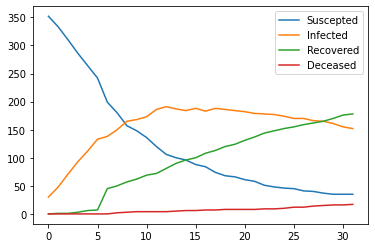

In [10]:
run(model,vaccinated,5)